# Import required packages

In [1]:
# Import packages
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider
import numpy as np

# Define function for Fermi-Dirac distribution

In [2]:
# Fermi-Dirac Distribution
def fermi(E: float, E_f: float, T: float) -> float:
    k_b = 8.617 * (10**-5) # eV/K
    return 1/(np.exp((E - E_f)/(k_b * T)) + 1)

# Edit general plot parameters

In [6]:
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18

mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 2

# Create static plot

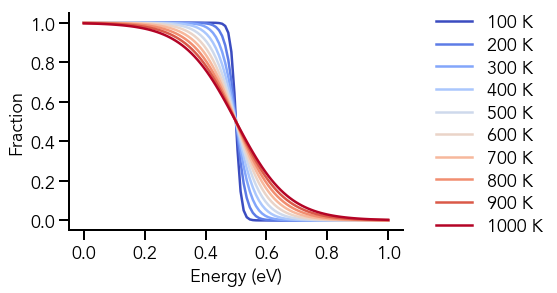

In [27]:
# Create figure and add axes
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

# Get colors from coolwarm colormap
colors = plt.get_cmap('coolwarm', 10)

# Temperature values
T = np.linspace(100, 1000, 10)

# Plot F-D data
for i in range(len(T)):
    x = np.linspace(0, 1, 100)
    y = fermi(x, 0.5, T[i])
    ax.plot(x, y, color=colors(i), linewidth=2.5)
    
# Add legend
labels = ['100 K', '200 K', '300 K', '400 K', '500 K', '600 K', '700 K', '800 K', '900 K', '1000 K']
ax.legend(labels, bbox_to_anchor=(1.05, -0.1), loc='lower left', frameon=False, labelspacing=0.2)
    
# Add axes labels
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('Fraction')

# Save and show plot
plt.savefig('StaticPlot.png', dpi=100, bbox_inches='tight')
plt.show()

# Change `matplotlib` backend for interactive mode

In [4]:
# Change matplotlib backend
%matplotlib notebook

# Create animation plot

<IPython.core.display.Javascript object>


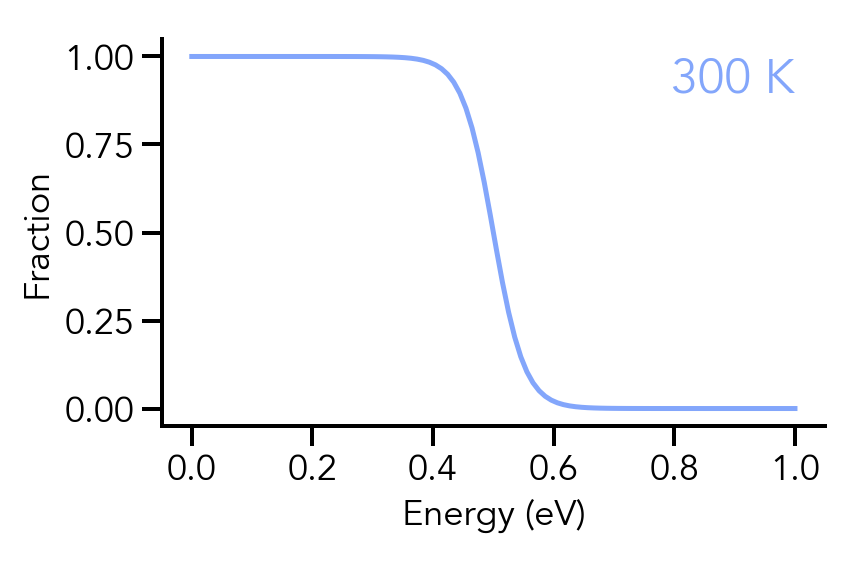

In [14]:
# Create figure and add axes
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

# Get colors from coolwarm colormap
colors = plt.get_cmap('coolwarm', 10)

# Temperature values
T = np.linspace(100, 1000, 10)

# Create variable reference to plot
f_d, = ax.plot([], [], linewidth=2.5)

# Add text annotation and create variable reference
temp = ax.text(1, 1, '', ha='right', va='top', fontsize=24)

# Set axes labels
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('Fraction')

# Animation function
def animate(i):
    x = np.linspace(0, 1, 100)
    y = fermi(x, 0.5, T[i])
    f_d.set_data(x, y)
    f_d.set_color(colors(i))
    temp.set_text(str(int(T[i])) + ' K')
    temp.set_color(colors(i))

# Create animation
ani = FuncAnimation(fig, animate, frames=range(len(T)), interval=500, repeat=True)

# Ensure the entire plot is visible
fig.tight_layout()

# Save and show animation
ani.save('AnimatedPlot.gif', writer='imagemagick', fps=2)
plt.show()

# Create interactive plot

<IPython.core.display.Javascript object>


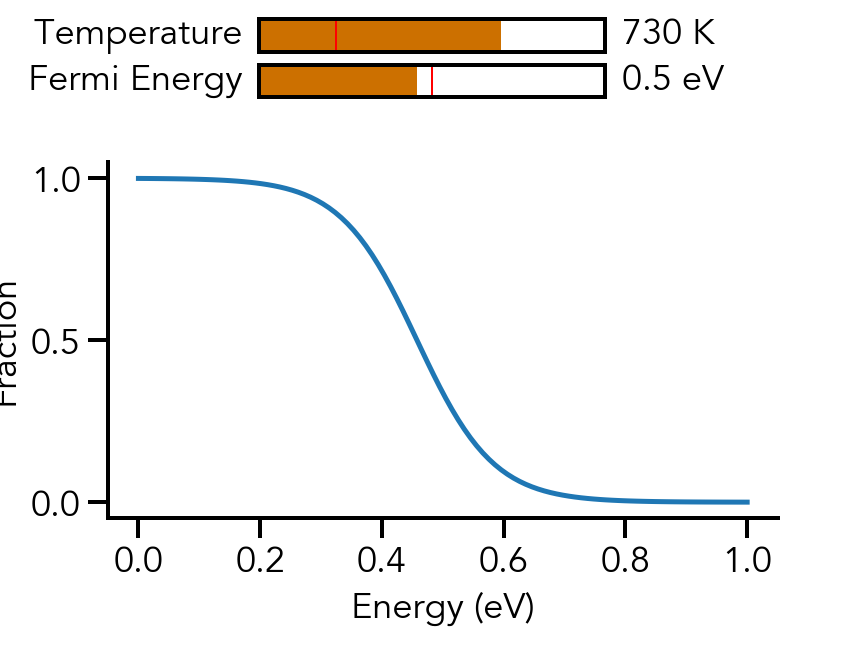

In [18]:
fig = plt.figure(figsize=(6, 4.5))

# Create main axis
ax = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.2, top=0.75)

# Create axes for sliders
ax_Ef = fig.add_axes([0.3, 0.85, 0.4, 0.05])
ax_Ef.spines['top'].set_visible(True)
ax_Ef.spines['right'].set_visible(True)

ax_T = fig.add_axes([0.3, 0.92, 0.4, 0.05])
ax_T.spines['top'].set_visible(True)
ax_T.spines['right'].set_visible(True)

# Create sliders
s_Ef = Slider(ax=ax_Ef, label='Fermi Energy ', valmin=0, valmax=1.0, valinit=0.5, valfmt=' %1.1f eV', facecolor='#cc7000')
s_T = Slider(ax=ax_T, label='Temperature ', valmin=100, valmax=1000, valinit=300, valfmt=' %i K', facecolor='#cc7000')

# Plot default data
x = np.linspace(-0, 1, 100)
Ef_0 = 0.5
T_0 = 300
y = fermi(x, Ef_0, T_0)
f_d, = ax.plot(x, y, linewidth=2.5)


# Update values
def update(val):
    Ef = s_Ef.val
    T = s_T.val
    f_d.set_data(x, fermi(x, Ef, T))
    fig.canvas.draw_idle()

s_Ef.on_changed(update)
s_T.on_changed(update)
    
# Set axis labels
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('Fraction')

plt.show()